In [11]:
from dataset import Dataset
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import os
from model import *
import torch
import utils
from engine import  evaluate

In [12]:
PATH = './model/one_class_epoch_9_.pth'
DATASET = './dataset'
device = torch.device('cuda') 
dataset = Dataset(DATASET, get_transform(train=False))

In [13]:

model = get_instance_segmentation_model(2)
model.to(device)
state = torch.load(PATH)
model.load_state_dict(state.get('model_state_dict'))

<All keys matched successfully>

In [14]:
img, mask= dataset[2]
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

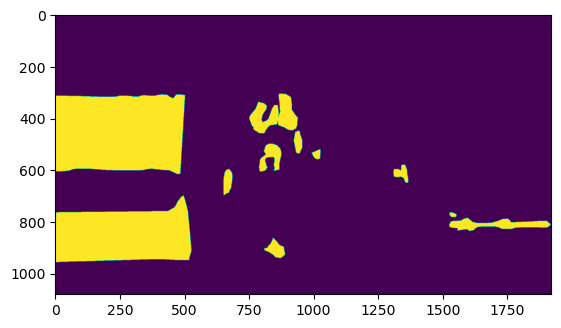

In [15]:
GT = mask['masks'][0].cpu().numpy()
plt.imshow(GT)

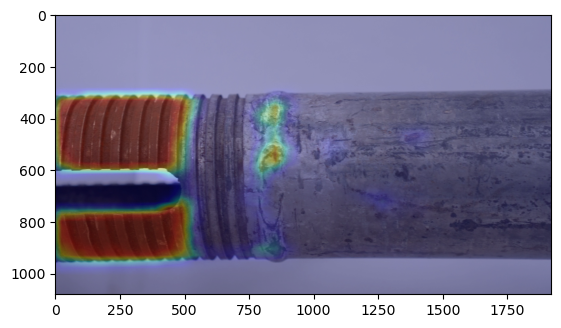

In [16]:
image = img.mul(255).permute(1, 2, 0).byte().numpy()
mask = prediction[0]['masks'][0, 0].cpu().numpy()
fig, ax = plt.subplots()
ax.imshow(image)
im = ax.imshow(mask, alpha=0.3, cmap='jet') 
plt.show()

In [17]:
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=False, 
    collate_fn=utils.collate_fn)


In [28]:
evaluate(model, data_loader, device=device)

creating index...
index created!
Test:  [  0/223]  eta: 0:01:59  model_time: 0.1415 (0.1415)  evaluator_time: 0.0770 (0.0770)  time: 0.5337  data: 0.0775  max mem: 1483
Test:  [100/223]  eta: 0:00:36  model_time: 0.1275 (0.1302)  evaluator_time: 0.0710 (0.0758)  time: 0.3150  data: 0.0812  max mem: 1792
Test:  [200/223]  eta: 0:00:06  model_time: 0.1250 (0.1300)  evaluator_time: 0.0660 (0.0749)  time: 0.3143  data: 0.0829  max mem: 1792
Test:  [222/223]  eta: 0:00:00  model_time: 0.1260 (0.1303)  evaluator_time: 0.0690 (0.0759)  time: 0.3149  data: 0.0817  max mem: 1792
Test: Total time: 0:01:06 (0.2997 s / it)
Averaged stats: model_time: 0.1260 (0.1303)  evaluator_time: 0.0690 (0.0759)
Accumulating evaluation results...
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.605
 Average Precision  (AP) 